In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

import density_plot
from config import plot_path, parameter, data_path
import runner

In [2]:
Omega_a_h_sq_harm, theta_i_s, f_a_s = runner.load_data(data_path + "/harmonic.npz")

theta_i_index = 0
Omega_unit = 0.004
Omega = Omega_a_h_sq_harm[theta_i_index, :] / Omega_unit
f_a_unit = 1e28
f_a = f_a_s / f_a_unit

## Polynomial

A		B		p		q
[ 0.00459895  1.06057977  0.32313241  1.53674346] +/-
 [ 0.00075045  0.00071496  0.03828774  0.00143196]
7/6 = 1.1666666666666667 , 3/2 = 1.5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in power
  """Entry point for launching an IPython kernel.


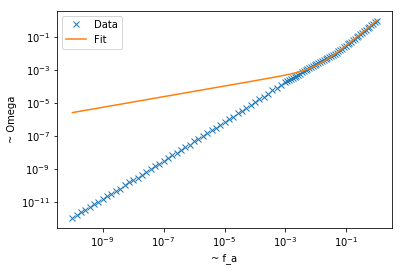

Text(0,0.5,'relative error')

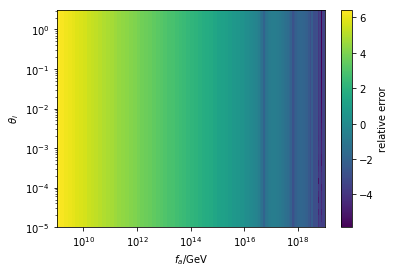

In [43]:
fn = lambda f, A, B, p, q: A*f**p + B*f**q
params, cov = opt.curve_fit(fn, f_a, Omega, p0=(0.01, 1, 7/6, 3/2))
err = np.sqrt(np.diag(cov))
A, B, p, q = params
print("A", "B", "p", "q", sep="\t\t")
print(params, "+/-\n", err)
print("7/6 =", 7/6, ", 3/2 =", 3/2)
plotter = plt.loglog
plotter(f_a, Omega, "x", label="Data")
plotter(f_a, fn(f_a, *params), label="Fit")
#plotter(f_a, A*f_a**p, label="Power Law 1 = %f" % p)
#plotter(f_a, B*f_a**q, label="Power Law 2 = %f" % q)
plt.legend()
plt.xlabel("~ f_a")
plt.ylabel("~ Omega")

plt.show()

F_A, THETA_I = np.meshgrid(f_a_s, theta_i_s)
Omega_a_h_sq_harm_fit = fn(f_a, *params) * Omega_unit * THETA_I**2 / theta_i_s[theta_i_index]**2
rel_err = np.abs(Omega_a_h_sq_harm - Omega_a_h_sq_harm_fit) / Omega_a_h_sq_harm
fig = plt.gcf()
ax = plt.gca()
ax.set_xscale("log")
ax.set_yscale("log")
plt.pcolormesh(f_a_s / 1e9, theta_i_s, np.log10(rel_err))
plt.xlabel(r"$f_a / \mathrm{GeV}$")
plt.ylabel(r"$\theta_i$")
cbar = plt.colorbar()
cbar.ax.set_ylabel("relative error")

## Changing Power Law

A		p		q		fs		a
[ 1.06461439  1.27766674  1.52723508  0.02162875  1.86862989] +/-
 [ 0.00013468  0.01100827  0.00041888  0.00130001  0.0776659 ]
7/6 = 1.1666666666666667 3/2 = 1.5


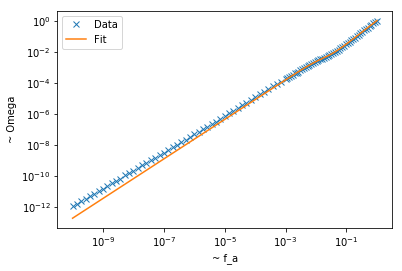

Text(0,0.5,'relative error')

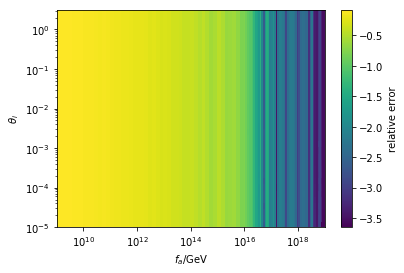

In [44]:
fn = lambda f, A, p, q, fs, a: A * f ** ((p + q * (f / fs)**a) / (1 + (f / fs)**a))
params, cov = opt.curve_fit(fn, f_a, Omega, p0=(0.8, 7/6, 3/2, 0.02, 1))
err = np.sqrt(np.diag(cov))
A, p, q, fs, a = params
print("A", "p", "q", "fs", "a", sep="\t\t")
print(params, "+/-\n", err)
print("7/6 =", 7/6, "3/2 =", 3/2)
plotter = plt.loglog
plotter(f_a, Omega, "x", label="Data")
#plotter(f_a, A*f_a**p, label="Power Law 1 = %f" % p)
#plotter(f_a, A*f_a**q, label="Power Law 2 = %f" % q)
plotter(f_a, fn(f_a, *params), label="Fit")
plt.legend()
plt.xlabel("~ f_a")
plt.ylabel("~ Omega")
plt.show()

F_A, THETA_I = np.meshgrid(f_a_s, theta_i_s)
Omega_a_h_sq_harm_fit = fn(F_A / f_a_unit, *params) * Omega_unit * THETA_I**2 / theta_i_s[theta_i_index]**2
rel_err = np.abs(Omega_a_h_sq_harm - Omega_a_h_sq_harm_fit) / Omega_a_h_sq_harm
fig = plt.gcf()
ax = plt.gca()
ax.set_xscale("log")
ax.set_yscale("log")
plt.pcolormesh(f_a_s / 1e9, theta_i_s, np.log10(rel_err))
plt.xlabel(r"$f_a / \mathrm{GeV}$")
plt.ylabel(r"$\theta_i$")
cbar = plt.colorbar()
cbar.ax.set_ylabel("relative error")

## Piecewise Power Law

A		B		p		q		fs
0.361875471179 [ 1.06417133  1.1182119   1.52459166  0.07034846] +/-
		 [ 0.00023153  0.02156014  0.00052229  0.00247921]
7/6 = 1.1666666666666667 3/2 = 1.5


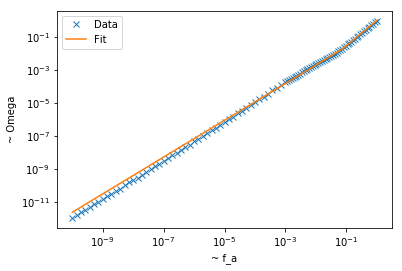

Text(0,0.5,'relative error')

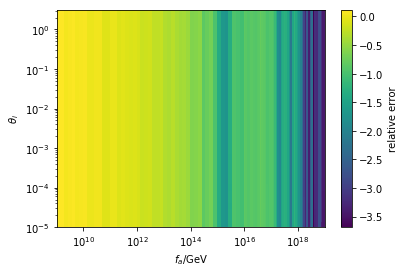

In [45]:
def fn(f, B, p, q, fs): 
    A = B*fs**(q - p)
    return np.where(f < fs, A*f**p, B*f**q)
params, cov = opt.curve_fit(fn, f_a, Omega, p0=(1, 7/6, 3/2, 1e-2))
err = np.sqrt(np.diag(cov))
B, p, q, fs = params
A = B*fs**(q - p)
print("A", "B", "p", "q", "fs", sep="\t\t")
print(A, params, "+/-\n\t\t", err)
print("7/6 =", 7/6, "3/2 =", 3/2)
plotter = plt.loglog
plotter(f_a, Omega, "x", label="Data")
#plotter(f_a, A*f_a**p, label="Power Law 1 = %f" % p)
#plotter(f_a, A*f_a**q, label="Power Law 2 = %f" % q)
plotter(f_a, fn(f_a, *params), label="Fit")
plt.legend()
plt.xlabel("~ f_a")
plt.ylabel("~ Omega")
plt.show()

F_A, THETA_I = np.meshgrid(f_a_s, theta_i_s)
Omega_a_h_sq_harm_fit = fn(F_A / f_a_unit, *params) * Omega_unit * THETA_I**2 / theta_i_s[theta_i_index]**2
rel_err = np.abs(Omega_a_h_sq_harm - Omega_a_h_sq_harm_fit) / Omega_a_h_sq_harm
fig = plt.gcf()
ax = plt.gca()
ax.set_xscale("log")
ax.set_yscale("log")
plt.pcolormesh(f_a_s / 1e9, theta_i_s, np.log10(rel_err))
plt.xlabel(r"$f_a / \mathrm{GeV}$")
plt.ylabel(r"$\theta_i$")
cbar = plt.colorbar()
cbar.ax.set_ylabel("relative error")

## Piecewise (Disconnected)

In [54]:

def f(fs):
    def fn(f, A, B, p, q): 
        return np.where(f < fs, A*f**p, B*f**q)
    params, cov = opt.curve_fit(fn, f_a, Omega, p0=(1, 1, 7/6, 3/2))
    err = np.sqrt(np.diag(cov))
    return np.linalg.norm(err)

res = opt.minimize(f, 1e-2)
res

      fun: 0.81027662240982645
 hess_inv: array([[1]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 0.01])

A		B		p		q
[ 0.46651691  1.06390159  1.13584709  1.52348575] +/-
 [  2.07917866e+00   5.45482803e-04   7.93200799e-01   1.22283792e-03]
7/6 = 1.1666666666666667 3/2 = 1.5


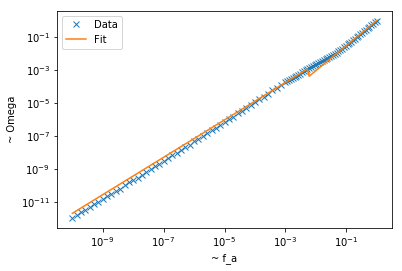

Text(0,0.5,'relative error')

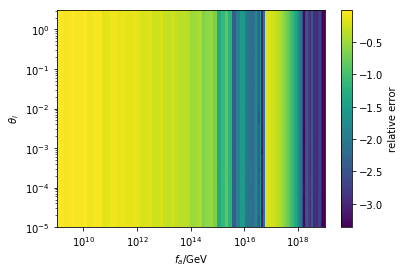

In [50]:
print("A", "B", "p", "q", sep="\t\t")
print(params, "+/-\n", err)
print("7/6 =", 7/6, "3/2 =", 3/2)
plt.loglog(f_a, Omega, "x", label="Data")
plt.loglog(f_a, fn(f_a, *params), label="Fit")
plt.legend()
plt.xlabel("~ f_a")
plt.ylabel("~ Omega")
plt.show()

F_A, THETA_I = np.meshgrid(f_a_s, theta_i_s)
Omega_a_h_sq_harm_fit = fn(F_A / f_a_unit, *params) * Omega_unit * THETA_I**2 / theta_i_s[theta_i_index]**2
rel_err = np.abs(Omega_a_h_sq_harm - Omega_a_h_sq_harm_fit) / Omega_a_h_sq_harm
fig = plt.gcf()
ax = plt.gca()
ax.set_xscale("log")
ax.set_yscale("log")
plt.pcolormesh(f_a_s / 1e9, theta_i_s, np.log10(rel_err))
plt.xlabel(r"$f_a / \mathrm{GeV}$")
plt.ylabel(r"$\theta_i$")
cbar = plt.colorbar()
cbar.ax.set_ylabel("relative error")